In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from pyod.models import abod
from sklearn.metrics import classification_report, confusion_matrix, recall_score#, f1_score
import optuna
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#dataset from www.kaggle.com

In [2]:
df=pd.read_csv("C:/Users/kanch/OneDrive/Desktop/creditcard.csv")
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum().sum()

0

In [7]:
print('Data does not have any NULL value.')
df.isnull().any()

Data does not have any NULL value.


Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
sample_corr = df.corr(numeric_only=True)[['Amount', 'Class']]
sample_corr

,Amount,Class
Time,-0.010596,-0.012323
V1,-0.227709,-0.101347
V2,-0.531409,0.091289
V3,-0.210880,-0.192961
V4,0.098732,0.133447
V5,-0.386356,-0.094974
V6,0.215981,-0.043643
V7,0.397311,-0.187257
V8,-0.103079,0.019875
V9,-0.044246,-0.097733


In [9]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


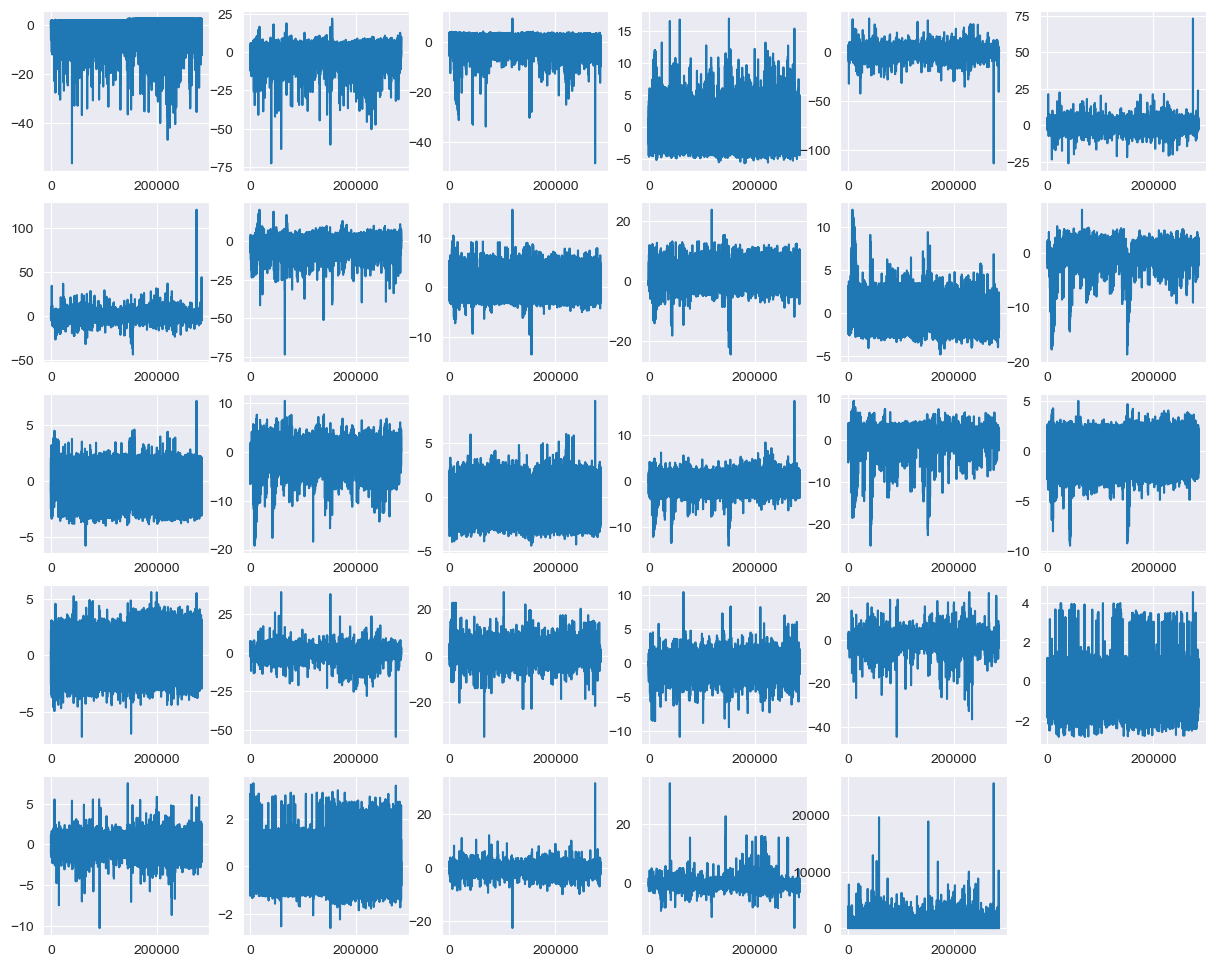

In [10]:
fig = plt.figure(figsize = (15, 12))

plt.subplot(5, 6, 1) ; plt.plot(df.V1) ; plt.subplot(5, 6, 15) ; plt.plot(df.V15)
plt.subplot(5, 6, 2) ; plt.plot(df.V2) ; plt.subplot(5, 6, 16) ; plt.plot(df.V16)
plt.subplot(5, 6, 3) ; plt.plot(df.V3) ; plt.subplot(5, 6, 17) ; plt.plot(df.V17)
plt.subplot(5, 6, 4) ; plt.plot(df.V4) ; plt.subplot(5, 6, 18) ; plt.plot(df.V18)
plt.subplot(5, 6, 5) ; plt.plot(df.V5) ; plt.subplot(5, 6, 19) ; plt.plot(df.V19)
plt.subplot(5, 6, 6) ; plt.plot(df.V6) ; plt.subplot(5, 6, 20) ; plt.plot(df.V20)
plt.subplot(5, 6, 7) ; plt.plot(df.V7) ; plt.subplot(5, 6, 21) ; plt.plot(df.V21)
plt.subplot(5, 6, 8) ; plt.plot(df.V8) ; plt.subplot(5, 6, 22) ; plt.plot(df.V22)
plt.subplot(5, 6, 9) ; plt.plot(df.V9) ; plt.subplot(5, 6, 23) ; plt.plot(df.V23)
plt.subplot(5, 6, 10) ; plt.plot(df.V10) ; plt.subplot(5, 6, 24) ; plt.plot(df.V24)
plt.subplot(5, 6, 11) ; plt.plot(df.V11) ; plt.subplot(5, 6, 25) ; plt.plot(df.V25)
plt.subplot(5, 6, 12) ; plt.plot(df.V12) ; plt.subplot(5, 6, 26) ; plt.plot(df.V26)
plt.subplot(5, 6, 13) ; plt.plot(df.V13) ; plt.subplot(5, 6, 27) ; plt.plot(df.V27)
plt.subplot(5, 6, 14) ; plt.plot(df.V14) ; plt.subplot(5, 6, 28) ; plt.plot(df.V28)
plt.subplot(5, 6, 29) ; plt.plot(df.Amount)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [13]:
data_features = df[feature_names]
data_target = df[target]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [17]:
pred = model.predict(X_test)

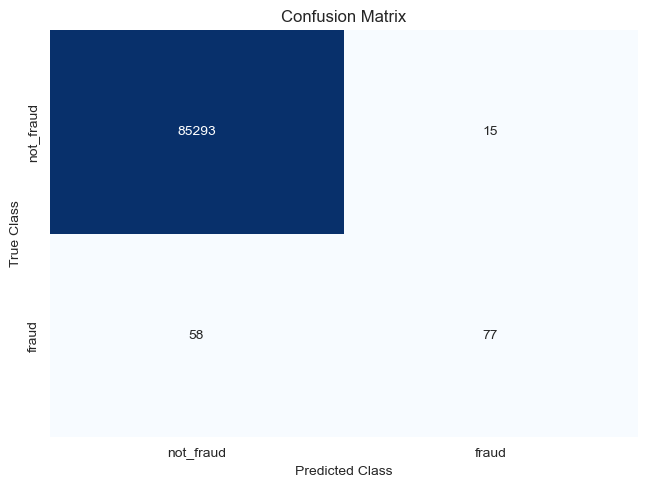

In [18]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [19]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.57
F1 Score for Logistic Regression Model 1 : 0.68


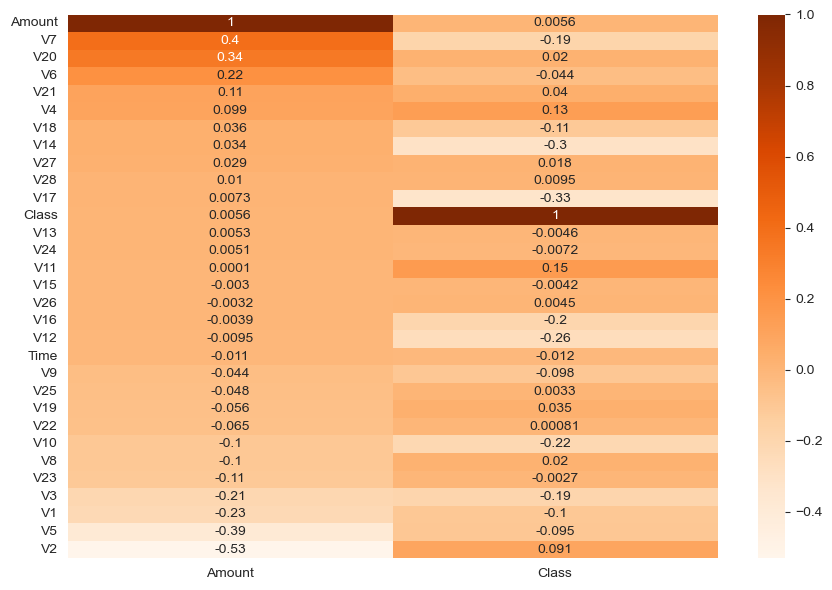

In [20]:
plt.figure(figsize=(9, 6))
sns.heatmap(data=sample_corr.sort_values(['Amount', 'Class'], ascending=False), annot=True, cmap='Oranges')
plt.tight_layout()

In [21]:
def show_feature_corr(data:pd.DataFrame, x:str, y:str, figsize:tuple=(9, 6)):
    plt.figure(figsize=figsize)
    sns.scatterplot(data=data, x=x, y=y, hue='Class')
    plt.tight_layout() 

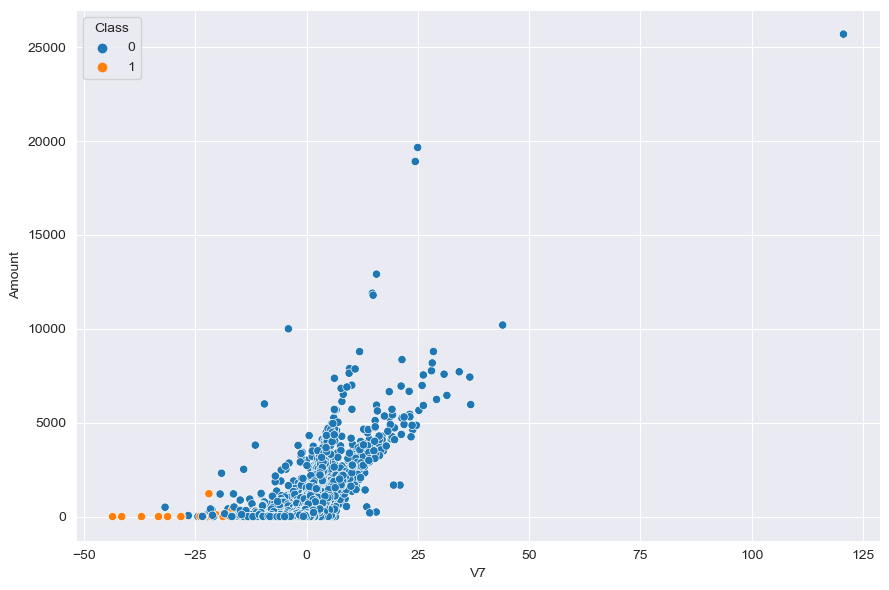

In [22]:
show_feature_corr(df, 'V7', 'Amount')

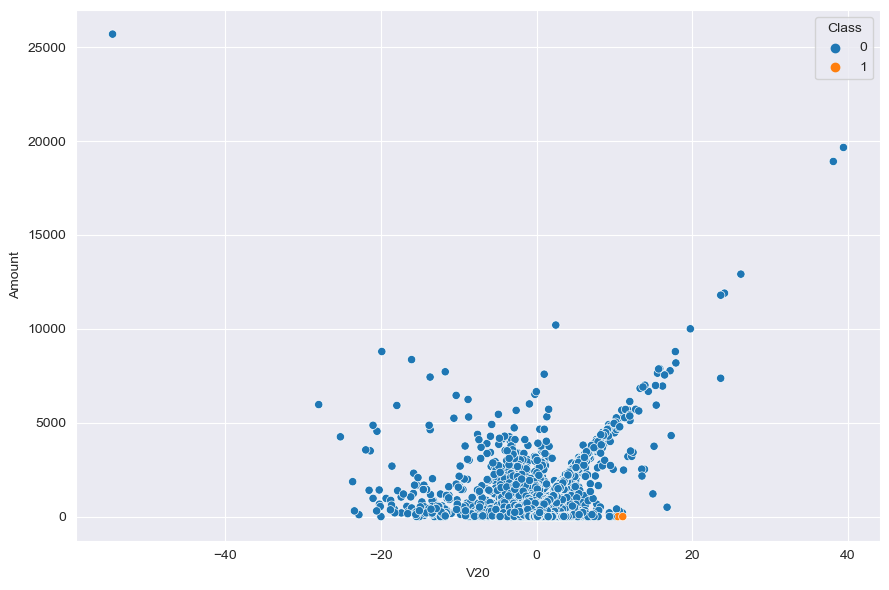

In [23]:
show_feature_corr(df, 'V20', 'Amount')

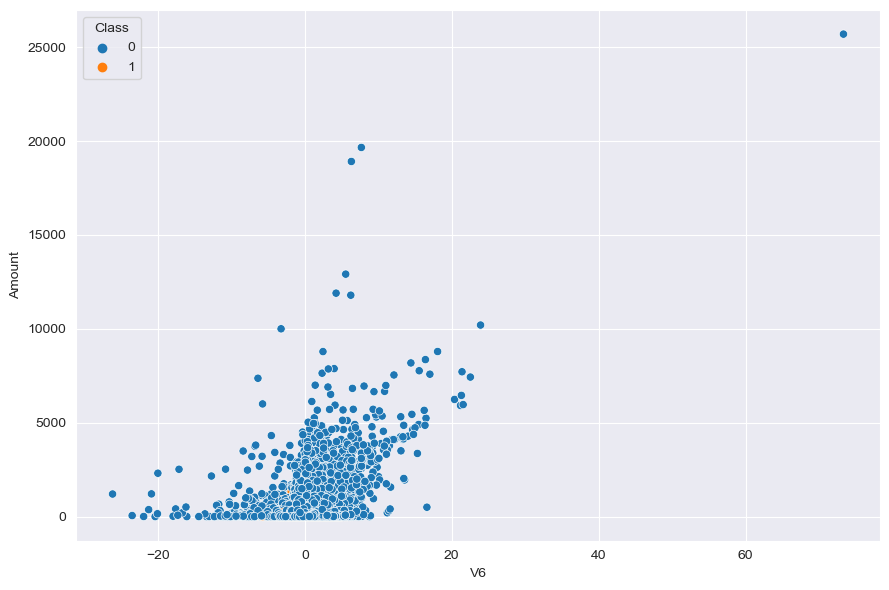

In [24]:
show_feature_corr(df, 'V6', 'Amount')

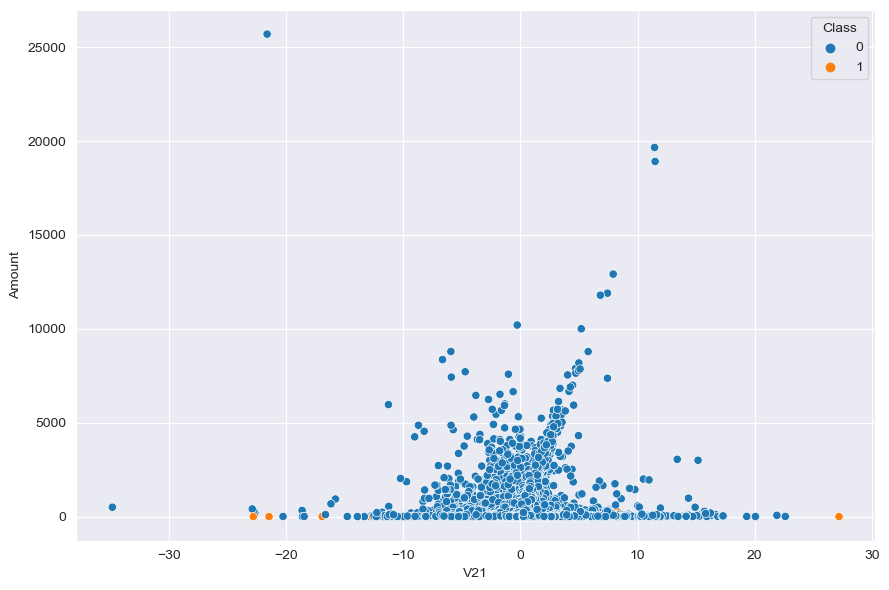

In [25]:
show_feature_corr(df, 'V21', 'Amount')

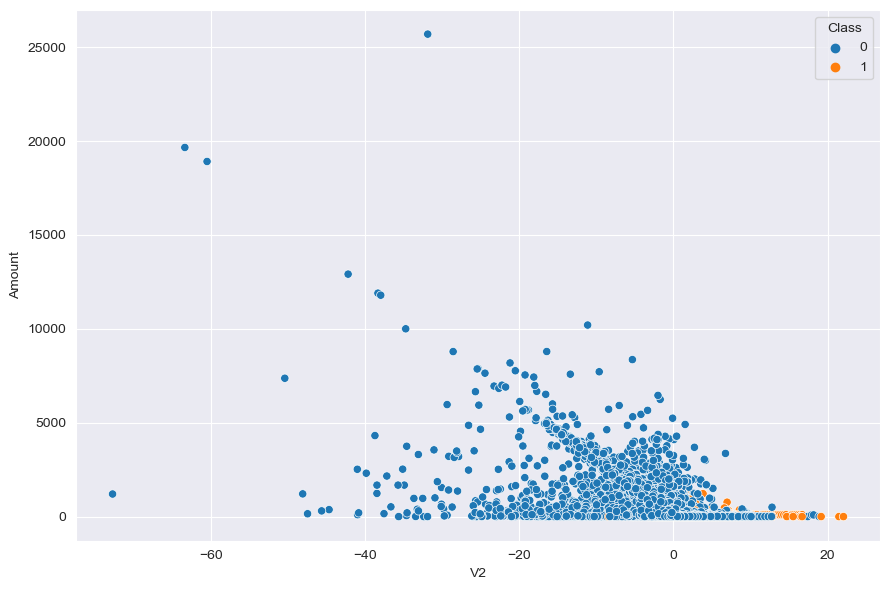

In [26]:
show_feature_corr(df, 'V2', 'Amount')

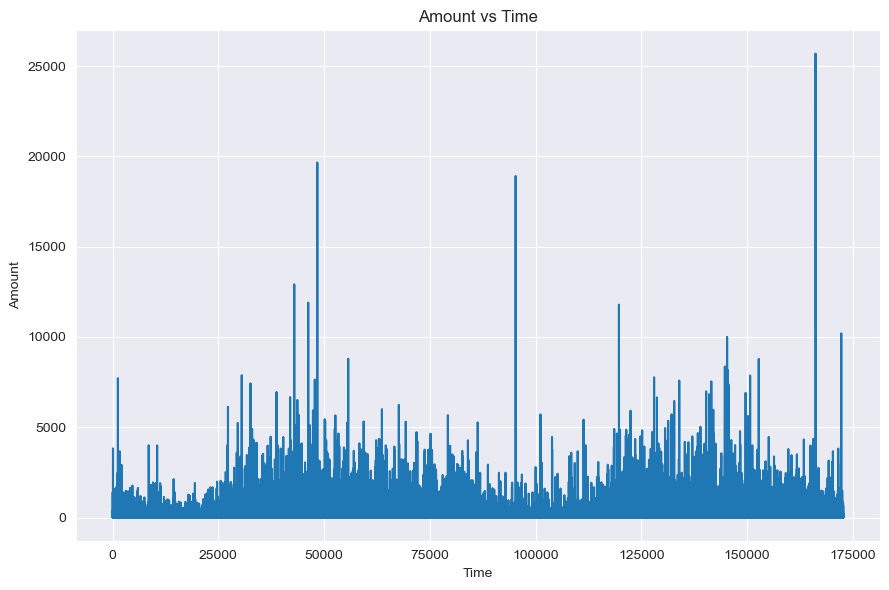

In [27]:
plt.figure(figsize=(9, 6))
plt.plot(df['Time'], df['Amount'])
plt.title('Amount vs Time')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.tight_layout()

In [28]:
categories, counts = np.unique(df['Class'], return_counts=True)
print(list(zip(categories.tolist(), counts.tolist())))

[(0, 284315), (1, 492)]


In [29]:
counts[1] / counts[0]

0.0017304750013189597

In [30]:
X = df.drop('Class', axis=1)

In [31]:
mms = MinMaxScaler()
X = mms.fit_transform(X)

In [32]:
X.shape

(284807, 30)

In [57]:
lof = LocalOutlierFactor(contamination=0.002)
lof_labels = lof.fit_predict(X)

In [34]:
y_true = df['Class'].values

In [35]:
np.unique(lof_labels, return_counts=True)

(array([-1,  1]), array([   570, 284237], dtype=int64))

In [36]:
lof_labels[lof_labels == 1] = 0
lof_labels[lof_labels == -1] = 1 

In [37]:
np.unique(lof_labels, return_counts=True)

(array([0, 1]), array([284237,    570], dtype=int64))

In [38]:
print(classification_report(y_true=y_true, y_pred=lof_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



In [39]:
print(confusion_matrix(y_true=y_true, y_pred=lof_labels))

[[283747    568]
 [   490      2]]


In [53]:
angleBasedOD = abod.ABOD(contamination=counts[1] / counts[0])
angleBasedOD_labels = angleBasedOD.fit_predict(X)

In [41]:
np.unique(angleBasedOD_labels, return_counts=True)

(array([0]), array([284807], dtype=int64))

In [42]:
print(classification_report(y_true=y_true, y_pred=angleBasedOD_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



In [43]:
print(confusion_matrix(y_true=y_true, y_pred=angleBasedOD_labels))

[[284315      0]
 [   492      0]]


In [55]:
if_params = {'n_estimators': 190, 'max_features': 0.8107961700848164, 'max_samples': 0.9898351379518305,
             'contamination': 0.0028000000000000004, 'random_state': 0}
IF = IsolationForest(**if_params)
IF_labels = IF.fit_predict(X)

In [45]:
np.unique(IF_labels, return_counts=True)

(array([-1,  1]), array([   798, 284009], dtype=int64))

In [46]:
IF_labels[IF_labels == 1] = 0 
IF_labels[IF_labels == -1] = 1

In [47]:
np.unique(IF_labels, return_counts=True)

(array([0, 1]), array([284009,    798], dtype=int64))

In [48]:
print(classification_report(y_true=y_true, y_pred=IF_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.31      0.50      0.38       492

    accuracy                           1.00    284807
   macro avg       0.65      0.75      0.69    284807
weighted avg       1.00      1.00      1.00    284807



In [49]:
print(confusion_matrix(y_true=y_true, y_pred=IF_labels))

[[283765    550]
 [   244    248]]


In [50]:
if_params = {'n_estimators': 754, 'max_features': 0.828788091898161,
             'max_samples': 0.6785623040459718, 'contamination': 0.009400000000000002}
IF = IsolationForest(**if_params)
IF_labels = IF.fit_predict(X)

In [51]:
np.unique(IF_labels, return_counts=True)

(array([-1,  1]), array([  2678, 282129], dtype=int64))

In [54]:
IF_labels[IF_labels == 1] = 0 
IF_labels[IF_labels == -1] = 1

In [56]:
np.unique(IF_labels, return_counts=True)

(array([-1,  1]), array([   798, 284009], dtype=int64))

In [59]:
print(classification_report(y_true=y_true, y_pred=IF_labels))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    284315
           1       0.00      0.50      0.00       492

    accuracy                           0.00    284807
   macro avg       0.00      0.17      0.00    284807
weighted avg       0.00      0.00      0.00    284807



In [60]:
cm = confusion_matrix(y_true=y_true, y_pred=IF_labels)
print(cm)

[[     0      0      0]
 [   550      0 283765]
 [   248      0    244]]


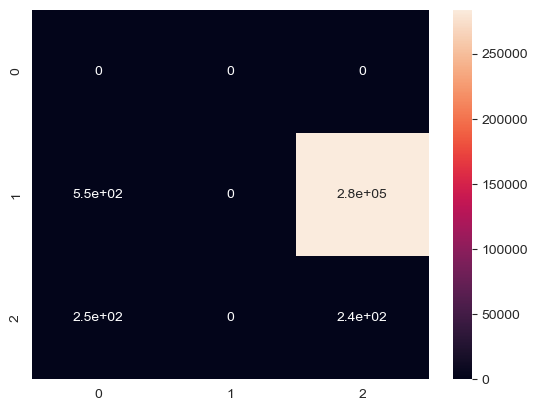

In [61]:
sns.heatmap(data=cm, annot=True);